## Matplotlib Basics

See here for a more complete matplotlib tutorial: http://matplotlib.org/users/pyplot_tutorial.html

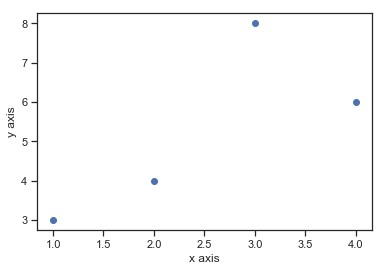

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='ticks')

#Scatter plot
x = [1,2,3,4]
y = [3,4,8,6]

plt.scatter(x,y)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()


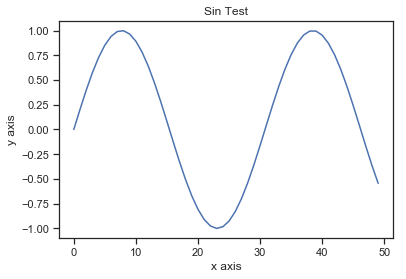

In [2]:
#Plot a function
plt.plot(np.sin(np.linspace(0, 10)))
plt.title('Sin Test')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()

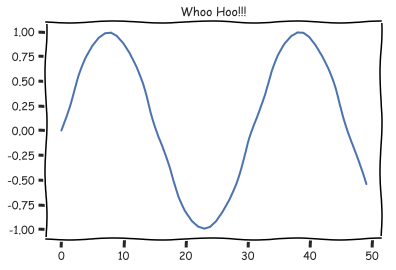

In [3]:
#Or, for fun, an XKCD sin wave...
plt.xkcd()  # Yes...
plt.plot(np.sin(np.linspace(0, 10)))
plt.title('Whoo Hoo!!!')
plt.show()